___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To display plots inline in Jupyter Notebook
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
# Provide the correct file path
file_path = 'C:\\Users\\RTX\\Desktop\\4th\\Data Science\\section\\assignment5\\Classified Data'  

# Read the content as CSV
df = pd.read_csv(file_path, delimiter=',', quotechar='"')

# Display the first few rows to verify
print(df.head())

# Save the data as a CSV file (optional)
df.to_csv('Classified Data.csv', index=False)


   Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1  


**Check the head of the dataframe.**

In [4]:
df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

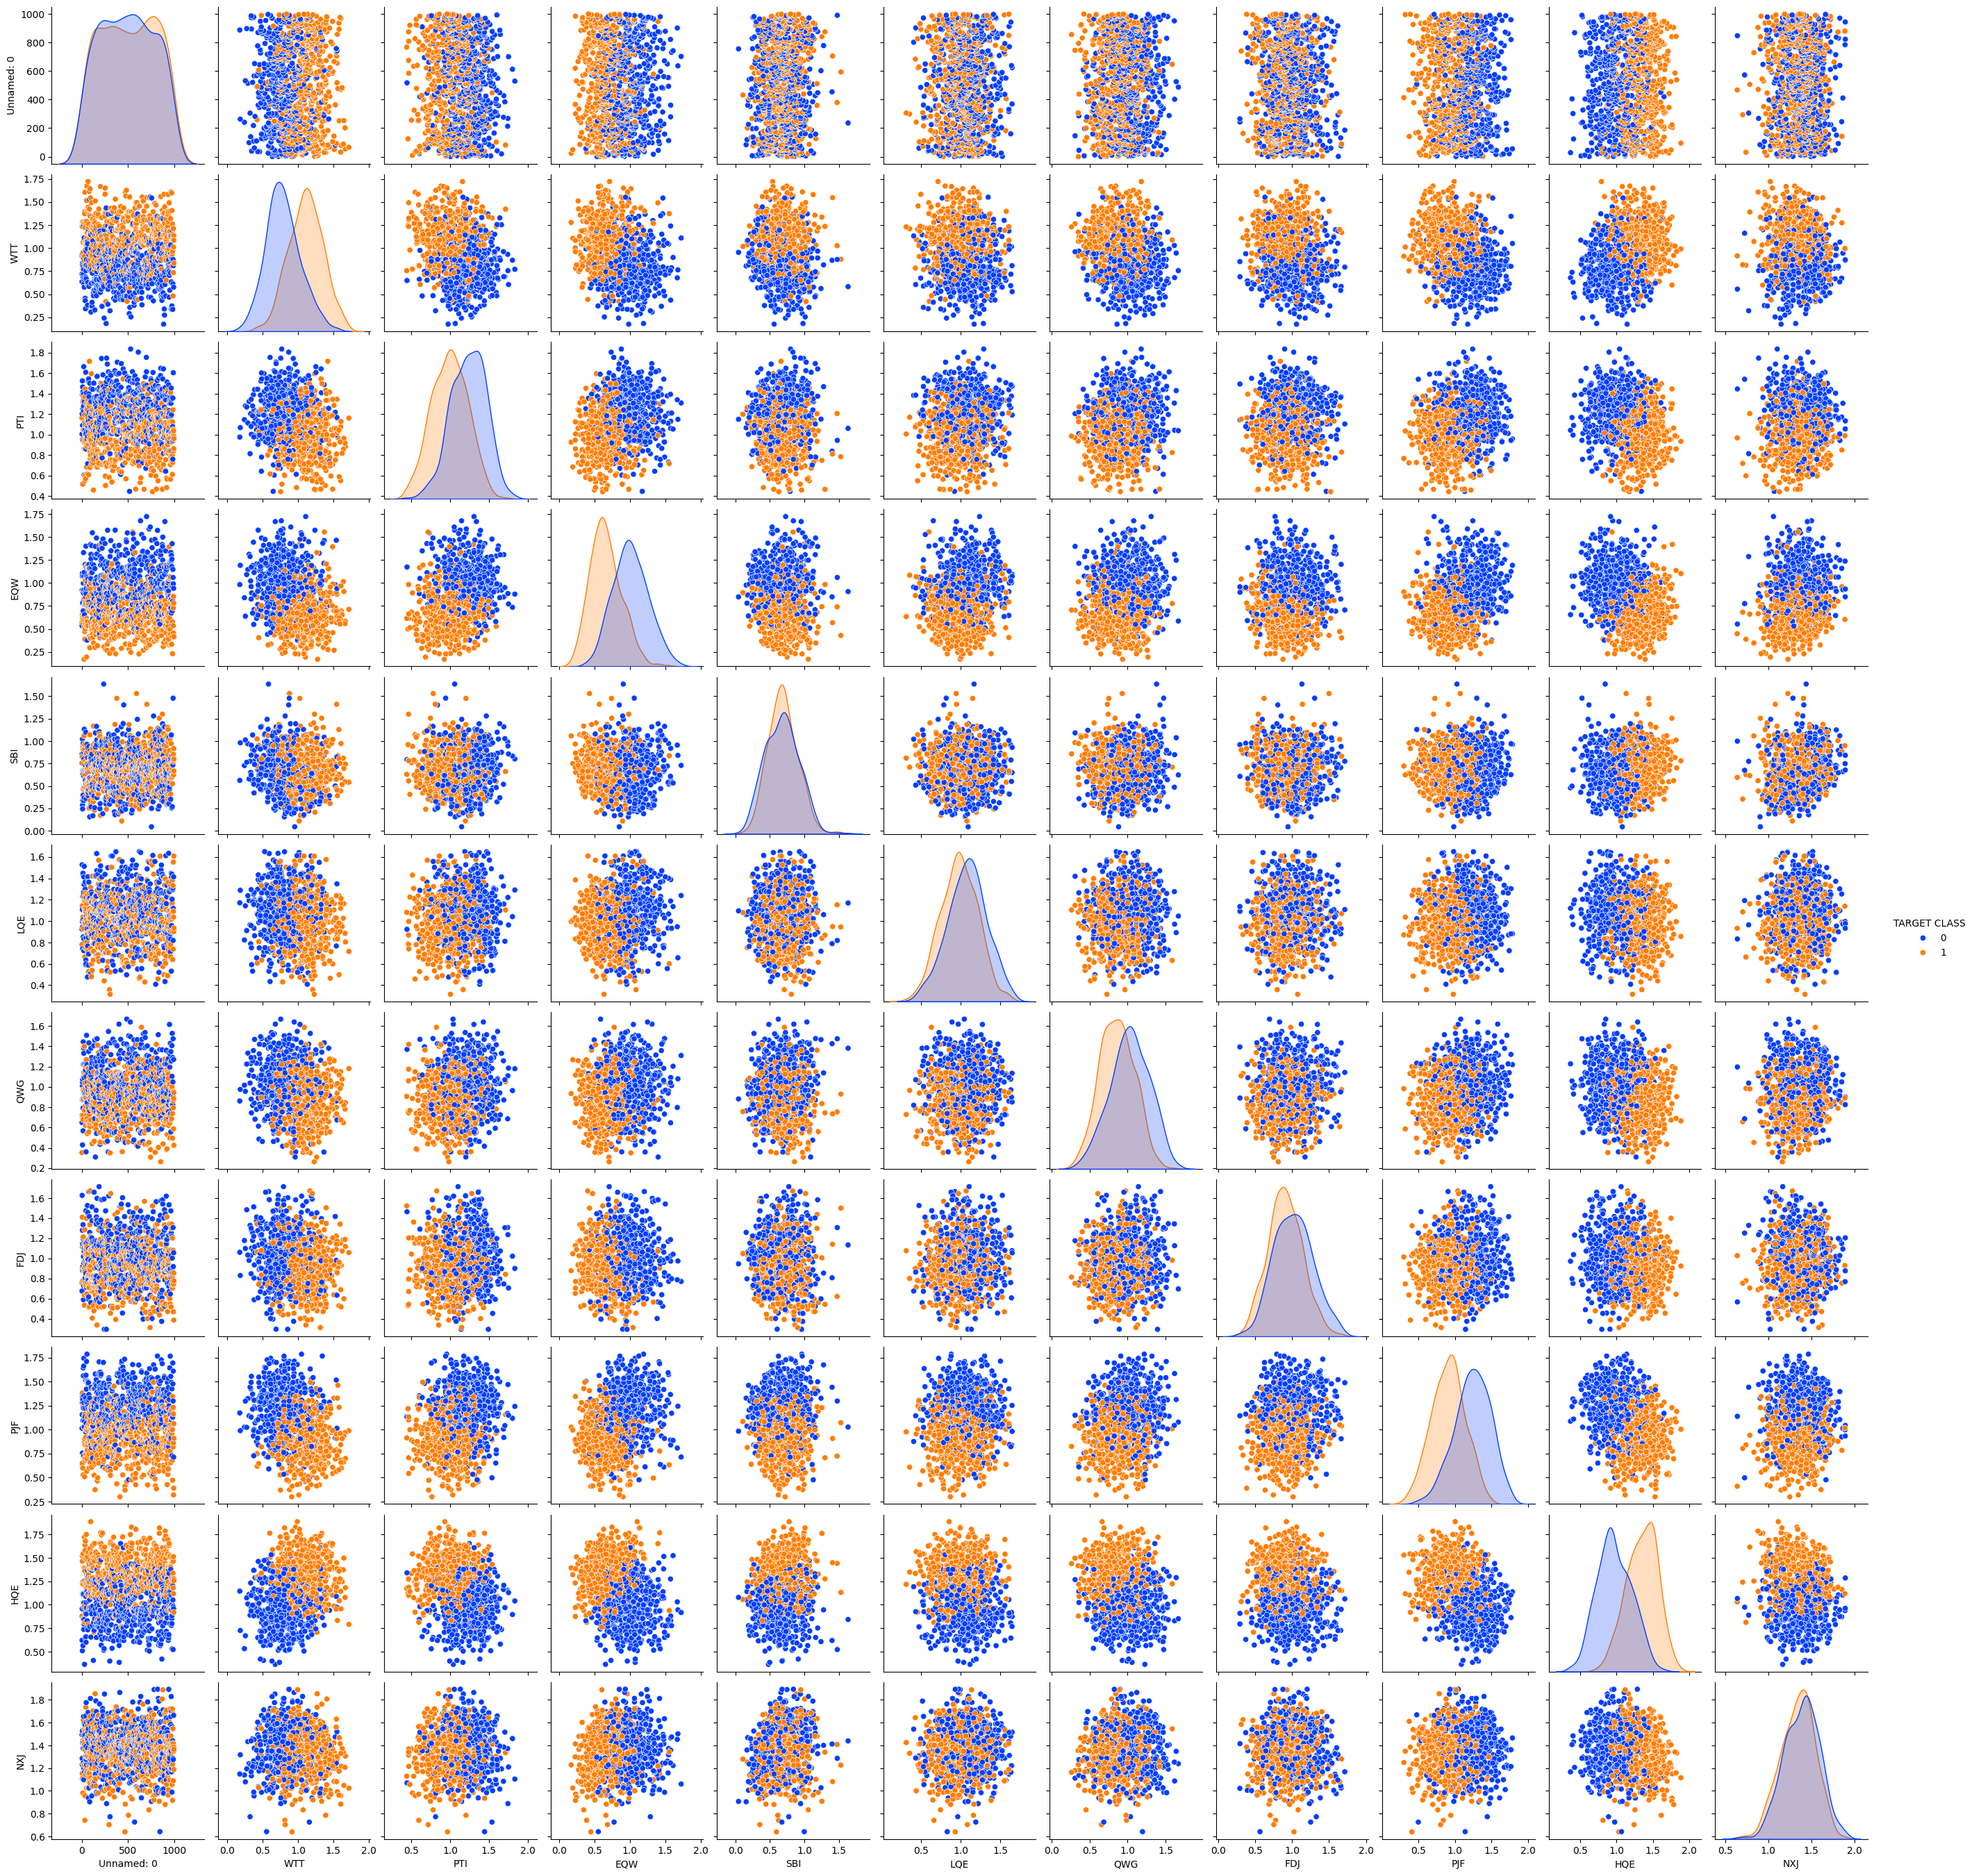

In [5]:
sns.pairplot(df, hue='TARGET CLASS', diag_kind='kde', palette='bright')
plt.show()

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [7]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
# Assuming 'df' is your DataFrame and you want to scale all columns except 'TARGET CLASS'
features = df.drop('TARGET CLASS', axis=1)  # Drop the target column
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the TARGET CLASS back to the DataFrame
scaled_df['TARGET CLASS'] = df['TARGET CLASS']

# Display the first few rows of the scaled DataFrame
scaled_df.head()


Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0 -0.798951 -1.482368 -0.949719 -0.643314             1  
1 -1.129797 -0.202240 -1.828051  0.636759             0  
2  2.599818  0.285707 -0.682494 -0.377850             0  
3  1.750208  1.066491  1.241325 -1.026987             1  
4  0.596782 -1.472352  1.040772  0.276510             1

In [13]:
df['TARGET CLASS']

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

** Create a StandardScaler() object called scaler.**

In [8]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler object
scaler = StandardScaler()


** Fit scaler to the features.**

In [9]:
# Assuming 'df' is your DataFrame and 'TARGET CLASS' is your target column
features = df.drop('TARGET CLASS', axis=1)  # Exclude the target column

# Fit the scaler to the features
scaler.fit(features)

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [10]:
# Transform the features to a scaled version
scaled_features = scaler.transform(features)

# Convert the scaled features back to a DataFrame for better interpretability
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()


Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
# Convert the scaled features to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()


Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [14]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = scaled_df  # Features
y = df['TARGET CLASS']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (700, 11)
X_test shape: (300, 11)
y_train shape: (700,)
y_test shape: (300,)


# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier


**Create a KNN model instance with n_neighbors=1**

In [16]:
# Create a KNN model instance with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)


**Fit this KNN model to the training data.**

In [17]:
# Fit the KNN model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [19]:
# Use the KNN model to predict values on the test data
y_pred = knn.predict(X_test)

# Display the predicted values
y_pred


array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], d

** Create a confusion matrix and classification report.**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
report = classification_report(y_test, y_pred)

# Display the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(report)


Confusion Matrix:
[[132  10]
 [ 12 146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       142
           1       0.94      0.92      0.93       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [21]:
# List to store error rates for different k values
error_rates = []

# Loop over different k values (e.g., from 1 to 20)
for k in range(1, 21):
    # Create a KNN model instance with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate the error rate (1 - accuracy)
    error_rate = 1 - knn.score(X_test, y_test)
    
    # Append the error rate to the list
    error_rates.append(error_rate)

# Print the error rates for each k value
print("Error rates for different k values:", error_rates)


Error rates for different k values: [0.07333333333333336, 0.08333333333333337, 0.05666666666666664, 0.06000000000000005, 0.046666666666666634, 0.05666666666666664, 0.053333333333333344, 0.053333333333333344, 0.053333333333333344, 0.06333333333333335, 0.05666666666666664, 0.050000000000000044, 0.050000000000000044, 0.053333333333333344, 0.06000000000000005, 0.06333333333333335, 0.053333333333333344, 0.053333333333333344, 0.050000000000000044, 0.053333333333333344]


**Now create the following plot using the information from your for loop.**

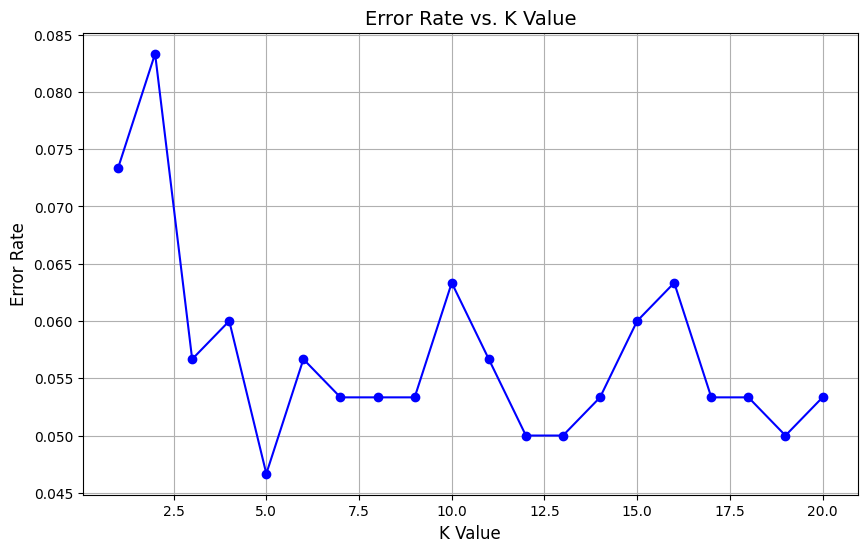

In [22]:
# Create the plot to visualize the error rates for different k values
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Error Rate vs. K Value', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()


## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [23]:
# Choose the best k value (for example, k=5)
best_k = 5

# Create a KNN model instance with the chosen k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Retrain the model on the training data
knn_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = knn_best.predict(X_test)

# Create a confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Create a classification report
report_best = classification_report(y_test, y_pred_best)

# Display the confusion matrix and classification report
print("Confusion Matrix:")
print(cm_best)

print("\nClassification Report:")
print(report_best)


Confusion Matrix:
[[136   6]
 [  8 150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [24]:
# Choose the best k value (for example, k=5)
best_k = 30

# Create a KNN model instance with the chosen k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Retrain the model on the training data
knn_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = knn_best.predict(X_test)

# Create a confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Create a classification report
report_best = classification_report(y_test, y_pred_best)

# Display the confusion matrix and classification report
print("Confusion Matrix:")
print(cm_best)

print("\nClassification Report:")
print(report_best)


Confusion Matrix:
[[135   7]
 [  9 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       142
           1       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Great Job!